# 6. Deep Learning Basics: Understanding Neural Networks with MNIST

## Introduction

Welcome to this interactive introduction to **Deep Learning**! In this notebook, we’ll explore the basics of neural networks and how they solve complex problems like recognizing handwritten digits.

Think of this as learning to use a powerful new tool—a tool inspired by the way our brains recognize patterns. By the end of this notebook, you’ll build and train a simple neural network to classify digits with confidence.

### Objectives

By the end of this notebook, you will:
1. Understand **how neural networks work** and how they learn.
2. Build a neural network step-by-step using the **MNIST dataset** of handwritten digits.
3. Train the model and **visualize its learning process**.
4. Evaluate the model’s accuracy and interpret its predictions.

### Key Features
- Learn **why deep learning is powerful** and how it differs from traditional methods.
- Build a simple neural network with **just 4 layers**.
- Visualize the learning process to understand **what happens inside the model**.

## What is Deep Learning?

Deep Learning is a subset of **Machine Learning** that uses multi-layered neural networks to identify patterns in data. Unlike traditional algorithms, deep learning models:
- Automatically learn features from raw data, eliminating the need for manual feature engineering.
- Learn hierarchically, starting with simple patterns (e.g., edges) and progressing to complex concepts (e.g., shapes or digits).

![Feature extraction is only required for ML algorithms](https://builtin.com/sites/www.builtin.com/files/styles/ckeditor_optimize/public/inline-images/3_what-is-deep-learning.png)

*(Source: What Is Deep Learning and How Does It Work? - BuiltIn.com)*

### Why is Deep Learning So Effective?

1. **Automatic Feature Learning**:
   - It identifies patterns directly from raw data, like pixels in an image or audio signals.
   
2. **Handles Complexity**:
   - Works well with noisy or unstructured data.

3. **Versatility**:
   - Can be applied to images, audio, text, and even time-series data.

### A Real Example: Handwriting Recognition

Imagine recognizing handwritten digits on a check. Traditional methods require manually programmed rules (e.g., detecting loops or lines). Deep learning simplifies this by:
1. Taking raw images as input.
2. Detecting simple edges or lines in the first layer.
3. Combining these into curves, shapes, and patterns in deeper layers.
4. Predicting the digit, such as "7" or "3."

This layered approach makes deep learning highly flexible and accurate.

## 1. Installing Required Libraries

Before we begin, ensure you have the necessary libraries installed. Run the following command:

In [15]:
%pip install tensorflow matplotlib --quiet

Note: you may need to restart the kernel to use updated packages.


## 2. Loading and Visualizing the MNIST Dataset

The **MNIST dataset** contains 70,000 grayscale images of handwritten digits (0-9). Each image is 28×28 pixels.

### Steps:
1. Load the dataset using TensorFlow.
2. Normalize the data (scale pixel values to [0, 1] for faster training).
3. Visualize a sample image to understand the data.

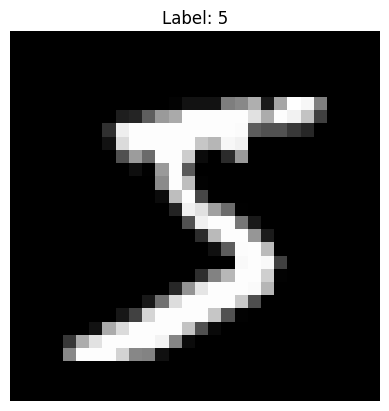

In [16]:
# Import libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize the data (scale pixel values to 0-1)
X_train = X_train / 255.0
X_test = X_test / 255.0

# Visualize a sample image
plt.imshow(X_train[0], cmap="gray")
plt.title(f"Label: {y_train[0]}")
plt.axis("off")
plt.show()

## 3. Building a Simple Neural Network

![Neural Network](https://upload.wikimedia.org/wikipedia/commons/4/46/Colored_neural_network.svg)

*(Source: Wikipedia)*

### What are Neural Networks?
Neural networks are the foundation of deep learning. Inspired by the human brain, they consist of:
- **Neurons**: Units that process information. Each neuron:
  1. Receives inputs.
  2. Performs a mathematical operation (e.g., weighted sum).
  3. Produces an output.
- **Layers**:
  - **Input Layer**: Accepts raw data, like an image's pixel values.
  - **Hidden Layers**: Process data to identify features and patterns.
  - **Output Layer**: Produces predictions, such as classifying a digit.

### How Neural Networks Work
1. **Input Layer**:
   - Receives raw inputs, such as pixel values in an image or historical weather data.
   
2. **Hidden Layers**:
   - Combine and transform the inputs, learning patterns like "high humidity + low temperature = rain."

3. **Output Layer**:
   - Provides predictions, such as "This is a 7" or "Tomorrow’s temperature will be 20°C."

### Why Neural Networks Are Powerful
1. **Adaptable**:
   - Handle diverse data types, including text, images, and time-series data.

2. **Hierarchical Learning**:
   - Detect simple patterns in early layers and complex patterns in deeper ones.

3. **Scalable**:
   - Perform well on large datasets, uncovering patterns beyond human intuition.

### Key Components:
1. **Neurons**:
   - Small units that process data.
   - Each neuron:
     1. Receives inputs (e.g., pixel values in an image).
     2. Applies a mathematical operation (e.g., a weighted sum of the inputs).
     3. Passes the result through an activation function to produce an output.

2. **Layers**:
   - **Input Layer**:
     - Accepts raw data (e.g., an image's pixel values or sensor readings).
   - **Hidden Layers**:
     - Process the data through neurons to extract features or patterns.
   - **Output Layer**:
     - Produces predictions (e.g., classifying a digit or forecasting a temperature).

### Create a Neural Network
Let’s create a neural network to classify digits:
1. **Flatten Layer**: Converts each 28×28 image into a single row of 784 values.
2. **Dense Layer (Hidden)**: 128 neurons with **ReLU activation** to detect patterns.
3. **Dense Layer (Output)**: 10 neurons with **Softmax activation** to output probabilities for each digit (0-9).

In [17]:
# Define the model
model = Sequential(
    [
        Flatten(input_shape=(28, 28)),  # Flatten the 28x28 image to a vector
        Dense(128, activation="relu"),  # Hidden layer with 128 neurons
        Dense(10, activation="softmax"),  # Output layer with 10 neurons (one per digit)
    ]
)

# Compile the model
model.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

# Display the model summary
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

## 4. Training the Neural Network

![Neural Network Training Process](https://www.researchgate.net/profile/Bhaskar-Ghosh/publication/344544069/figure/fig2/AS:944366457716736@1602165917012/Neural-Network-Training-Process-2.ppm)

*(Source: An Empirical Analysis of Generative Adversarial Network Training Times with Varying Batch Sizes)*

### How Training Works
1. **Forward Pass**:
   - Data flows through the network from input to output.
   - Each layer processes the data, extracting features and building complexity.

2. **Loss Calculation**:
   - The difference between the model’s prediction and the true value is calculated using a **loss function**.

3. **Backward Pass (Backpropagation)**:
   - The model adjusts weights and biases in the neurons to minimize the loss.

4. **Iteration**:
   - The process repeats over multiple passes (epochs) until the model achieves acceptable accuracy.

By combining multiple layers of neurons, neural networks can identify simple patterns in early layers and complex relationships in deeper ones, making them highly versatile.

### Real world Example

Let’s say we want to teach a neural network to predict house prices based on the number of bedrooms.

1. **Forward Pass**:
   - Input: Number of bedrooms (e.g., `3`).
   - The network processes this input through its layers:
     - **Input Layer**: Accepts the number `3`.
     - **Hidden Layers**: Multiply the input by weights (e.g., `weight = 100,000`) and add a bias (e.g., `bias = 50,000`) to estimate the price.
     - **Output Layer**: Produces the prediction: `$350,000`.

2. **Loss Calculation**:
   - Compare the prediction (`$350,000`) with the actual price (`$300,000`).
   - The **loss function** measures the difference between these values (e.g., error = `$50,000`).

3. **Backward Pass (Backpropagation)**:
   - The network adjusts its weights and biases:
     - Decrease the weight slightly if the prediction is too high.
     - Fine-tune the bias to reduce the error.

4. **Iteration**:
   - Repeat the process with more examples (e.g., houses with `2`, `4`, or `5` bedrooms).
   - Over multiple **epochs**, the network learns patterns, such as "more bedrooms generally mean higher prices."
   - Eventually, the loss becomes small, and the network can predict prices accurately.

### Steps:
1. Use **Training Data**: Teach the model using labeled examples (images with known digits).
2. Minimize **Loss**: Adjust weights to reduce the error in predictions.
3. Monitor **Accuracy**: Check how often the model predicts correctly.

In [18]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2, batch_size=32)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8668 - loss: 0.4738 - val_accuracy: 0.9533 - val_loss: 0.1591
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9600 - loss: 0.1386 - val_accuracy: 0.9635 - val_loss: 0.1231
Epoch 3/10
 800/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9716 - loss: 0.0983

## 5. Visualizing Training Performance

We’ll plot:
- **Accuracy**: Percentage of correct predictions during training and validation.
  - **Training Accuracy**: Shows how well the model is learning from the data it has seen during training.
  - **Validation Accuracy**: Evaluates how well the model performs on unseen validation data. This helps ensure the model generalizes well to new data.

- **Loss**: The error in the model's predictions, which the model aims to minimize.
  - **Training Loss**: Represents how well the model is fitting the training data. A decreasing loss indicates the model is improving during training.
  - **Validation Loss**: Reflects how well the model performs on unseen data. If validation loss starts increasing while training loss decreases, the model might be overfitting.

### Why These Metrics Matter:
- **Accuracy**: Indicates the model's success in making correct predictions. Higher accuracy reflects better performance.
- **Loss**: Tracks the model's optimization progress. A lower loss value generally implies better model performance.

The goal is to maintain a balance where both training and validation accuracy are high, and their corresponding loss values are low. This ensures the model performs well on both the data it has seen and new, unseen data.

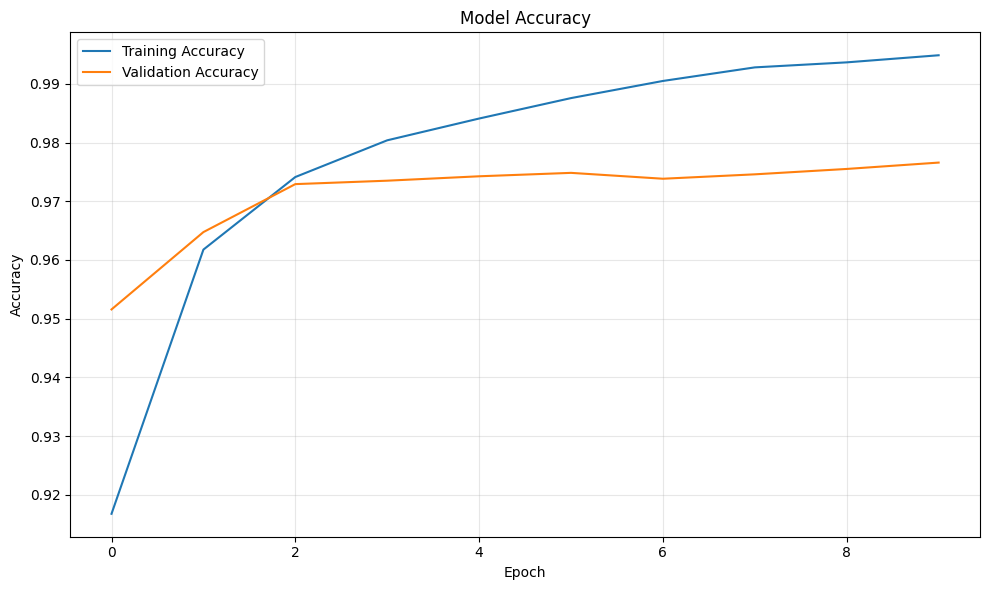

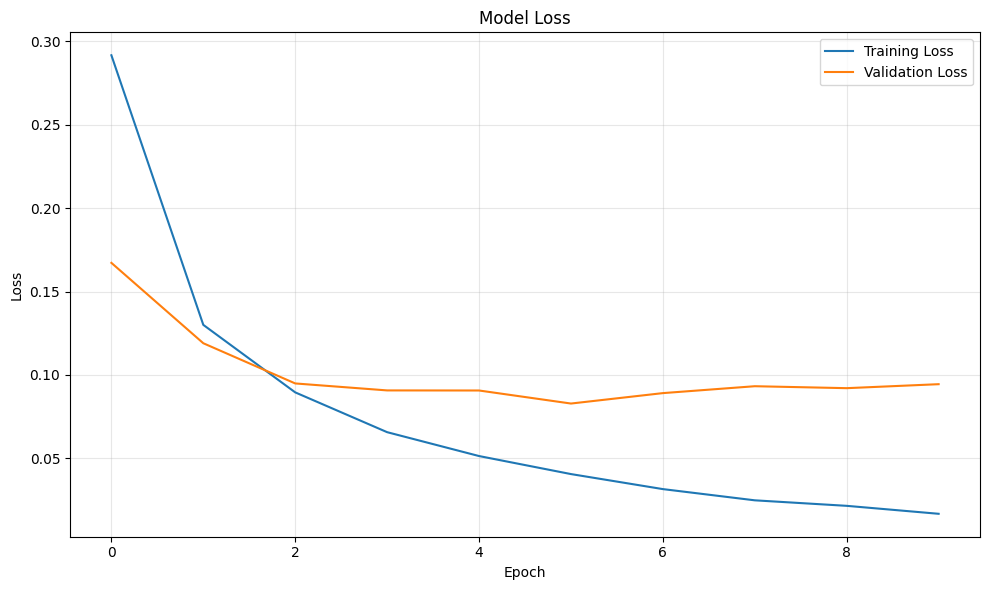

In [ ]:
# Plot accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Plot loss
plt.figure(figsize=(10, 6))
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## 6. Evaluating the Model

To test the model, we’ll use **unseen data** (the test set) and measure its accuracy.

In [ ]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.2f}")

Test Accuracy: 0.98


## 7. Making Predictions

Finally, let’s visualize some predictions and compare them to the true labels.

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step


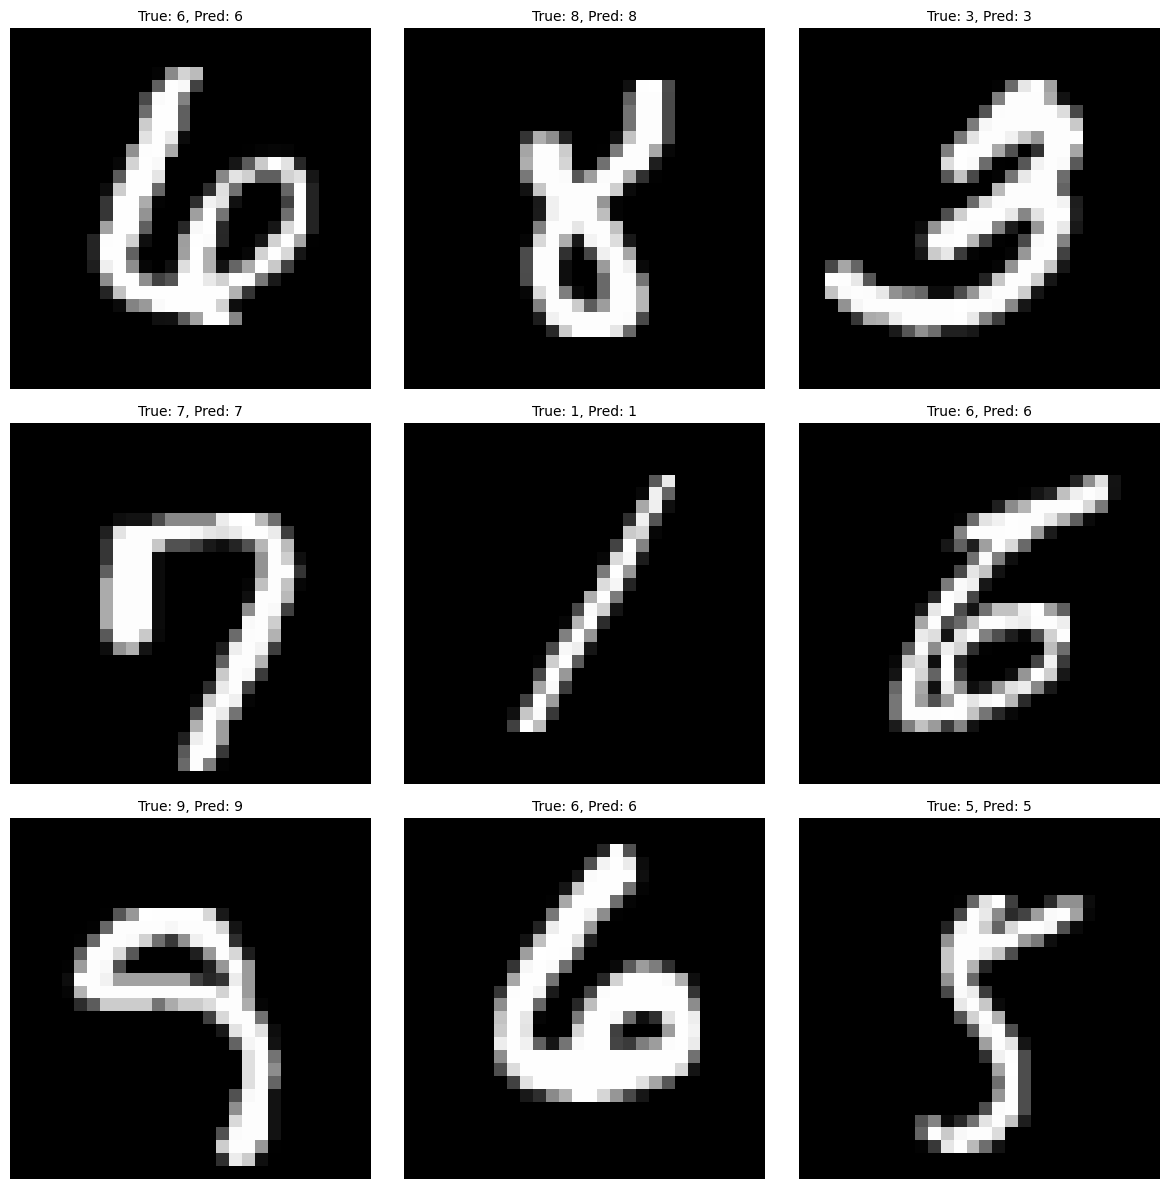

In [ ]:
import numpy as np

# Display predictions in a grid format
def display_predictions_grid(X_test, y_test, predictions, grid_size=(3, 3)):
    rows, cols = grid_size
    fig, axes = plt.subplots(rows, cols, figsize=(12, 12))
    indices = np.random.choice(
        len(X_test), rows * cols, replace=False
    )  # Random selection of images

    for i, ax in enumerate(axes.flat):
        idx = indices[i]
        ax.imshow(X_test[idx], cmap="gray")
        true_label = y_test[idx]
        predicted_label = np.argmax(predictions[idx])
        ax.set_title(f"True: {true_label}, Pred: {predicted_label}", fontsize=10)
        ax.axis("off")

    plt.tight_layout()
    plt.show()


# Generate predictions from the model
predictions = model.predict(X_test)

# Display a 3x3 grid of predictions
display_predictions_grid(X_test, y_test, predictions, grid_size=(3, 3))

## 8. Conclusion

1. **Deep Learning** is a powerful tool for recognizing patterns in complex data, such as handwritten digits.
2. By stacking layers, neural networks hierarchically detect features—from simple edges to complete objects.
3. The MNIST dataset is a great starting point, but this same approach can scale to real-world challenges, including sequential data and operational tasks.

### Applications in Kubernetes and Time-Series Data:
- **Anomaly Detection in Kubernetes**:
  - Monitor time-series metrics, such as CPU and memory usage, to detect unusual patterns signaling performance issues.
- **Event Message Prediction**:
  - Use sequential data to anticipate Kubernetes event messages, enabling proactive response to failed or misbehaving workloads.

### Scalability of Neural Networks:
- **Time-Series Analysis**:
  - Neural networks like LSTMs are designed to handle sequential data, making them ideal for analyzing resource trends and predicting incidents in Kubernetes clusters.
- **Operational Automation**:
  - Apply neural networks to automate tasks, such as classifying event messages or detecting patterns in system logs.

**Next Steps**:
In the next notebook, you will:
1. Explore **time-series analysis** with deep learning techniques like **Long Short-Term Memory (LSTM)** networks.
2. Build and train an LSTM model to classify Kubernetes event messages.
3. Leverage these models to predict system behavior and make proactive adjustments in containerized environments.

This transition will help you apply deep learning techniques to real-world Kubernetes challenges, advancing your operational AI skills.